In [1]:
import numpy as np
from scipy.stats import maxwell


In [9]:
# number of points and dimensions
num_points = 1000
dim = 3

# generate initial points
points_0 = np.random.rand(num_points, dim)

# standard deviation for gaussian distribution
std_dev = 0.1

# number of iterations
num_iterations = 200

# copy 
points_translated = points_0.copy()

# apply translations
for _ in range(num_iterations):
    # generate translation vector
    trans_mat = np.random.normal(scale=std_dev, size=(num_points, dim))
    # apply translation
    points_translated += trans_mat
    
translation_vec = points_translated - points_0
print("translation_vec =", translation_vec.shape)

# Calculate Euclidean distance
distances = np.sqrt(np.sum((points_translated - points_0) ** 2, axis= 1))

import matplotlib.pyplot as plt

# values for x axis
x = np.linspace(min(distances), max(distances), num_points)

# calc the standard deviation of the distances
std_all = np.sqrt(std_dev ** 2 * num_iterations)
print("std_all =", std_all)

# maxwell-boltzmann distribution
y = x ** 2 * np.exp(-x**2 / (2 * std_all ** 2))
# average
y = y / (y.sum() * (max(distances) - min(distances)) / num_points)

# plot histogram and pdf

translation_vec = (1000, 3)
std_all = 1.4142135623730951


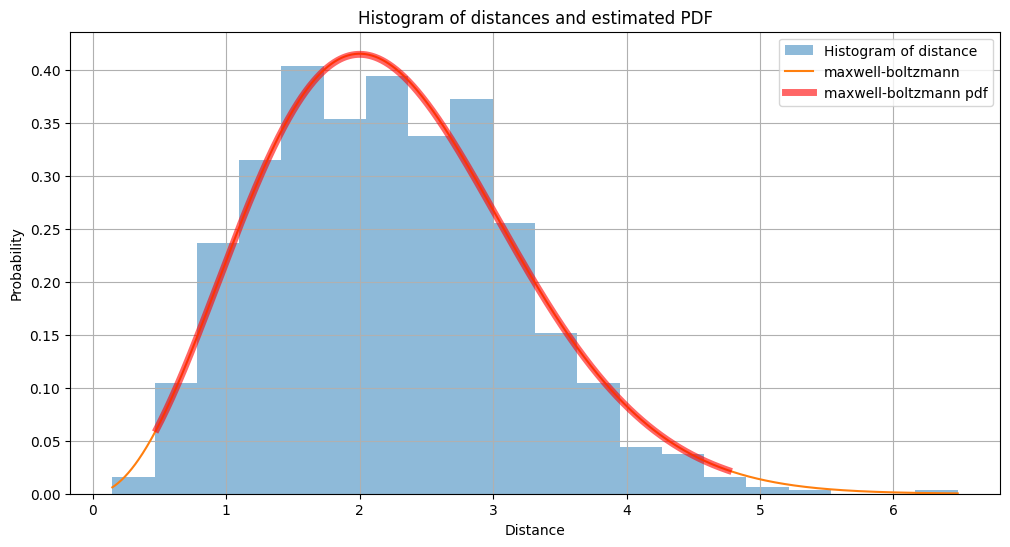

In [10]:
plt.figure(figsize=(12,6))
plt.hist(distances, bins=20, density=True, alpha=0.5, label='Histogram of distance')
plt.plot(x, y, label='maxwell-boltzmann')
plt.title('Histogram of distances and estimated PDF')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
loc = 0 
scale=std_all 
x = np.linspace(maxwell.ppf(0.01, loc=loc, scale=scale), maxwell.ppf(0.99, loc=loc, scale=scale), num_points)
plt.plot(x, maxwell.pdf(x, loc=loc, scale=scale), 'r-', lw=5, alpha=0.6, label='maxwell-boltzmann pdf')
plt.legend()
plt.show()

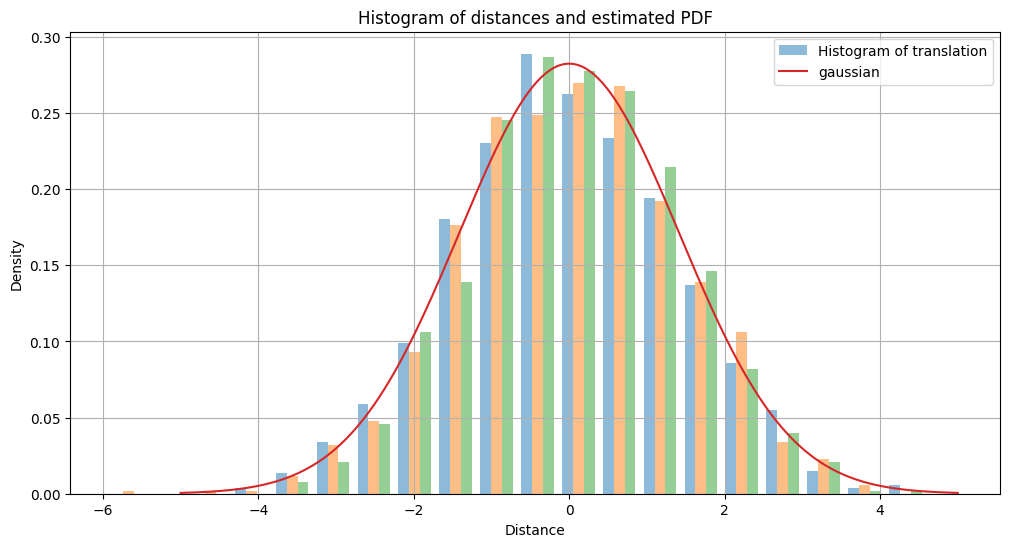

In [11]:
# calc the translation
translation_vec = points_translated - points_0

# values for the x axis (distances)
x_2 = np.linspace(-5, 5, num_points)

# gaussian distribution
z = np.exp(-x_2**2 / (2*std_all ** 2))
z = z/ (z.sum() * 10 / num_points)
# plot histogram and pdf
plt.figure(figsize=(12,6))
plt.hist(translation_vec, bins=20, density=True, alpha=0.5, label='Histogram of translation')
plt.plot(x_2, z, label='gaussian')
plt.title('Histogram of distances and estimated PDF')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# RANDOM WALK IN SO3 SPACE
from scipy.spatial.transform import Rotation as R
import torch

In [22]:
# Function to generate random rotation matrix
# A rotation vector is a 3 dimensional vector which is co-directional to the axis of rotation and whose norm gives the angle of rotation
def random_rotation_matrix():
    # @jason, should generate random vector, R.random(3)
    return R.from_rotvec(np.random.rand(3)).as_matrix()

In [15]:
from scipy.linalg import  expm 
from tqdm import tqdm

In [16]:
# lie algebra matrix
G1 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
G2 = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
G3 = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

In [17]:
G = np.array([G1, G2, G3])


In [18]:
# number of matrices
matrix_num = 5000

In [20]:
# standard deviation of gaussian distribution
std_dev = torch.tensor([0.2] * 100)
std_all = torch.tensor(([torch.sqrt(torch.sum(std_dev[:index+1] ** 2)) for index in range(len(std_dev))]))

In [23]:
# initial rotation matrices
rot_mats_0 = np.array([random_rotation_matrix() for _  in range(matrix_num)])

In [25]:
# store the current rotation matrices
rot_mats = np.copy(rot_mats_0)
rot_vec_list = []

# initial rotation
print("test")

In [26]:
# store the current rotation matrices
rot_mats = np.copy(rot_mats_0)

In [28]:
random_rotation_matrix()

array([[ 0.77342551, -0.53851372,  0.33438891],
       [ 0.55486512,  0.83021005,  0.05362817],
       [-0.30649254,  0.14406335,  0.94090811]])

In [27]:
rot_vec_list = []
steps = len(std_dev)

In [31]:
progress_bar = tqdm(range(steps), desc='Progress:', ncols=100)
angles_list = []
for process_index in progress_bar:
    # generate rotation angles from gaussian distribution
    # @jason, should use R.random(matrix_num).as_rotvec(), this should not be angles
    # but rotation vectors
    angles = np.clip(np.random.normal(loc=0, scale=std_dev[process_index], size=(matrix_num, 3)), -np.pi, np.pi)
    # generate rotation matrices, this converts S(v)?? 
    rot_matrix = np.einsum('ijk,li->ljk', G, angles)
    # exp(R)
    perturbations = expm(rot_matrix)
    # apply rotations
    rot_mats = np.matmul(perturbations, rot_mats)
    # calculate rotation angles from initial positions
    # 1 + 2 * cos theta = trace(R)
    angles = np.array([np.arccos((np.trace(np.matmul(rot_mat_0.T, rot_mat)) - 1 )/2) for rot_mat_0, rot_mat in zip(rot_mats_0, rot_mats)])
    angles_list.append(angles)
    
print("std", std_all)

Progress:: 100%|██████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.31it/s]

std tensor([0.2000, 0.2828, 0.3464, 0.4000, 0.4472, 0.4899, 0.5292, 0.5657, 0.6000,
        0.6325, 0.6633, 0.6928, 0.7211, 0.7483, 0.7746, 0.8000, 0.8246, 0.8485,
        0.8718, 0.8944, 0.9165, 0.9381, 0.9592, 0.9798, 1.0000, 1.0198, 1.0392,
        1.0583, 1.0770, 1.0954, 1.1136, 1.1314, 1.1489, 1.1662, 1.1832, 1.2000,
        1.2166, 1.2329, 1.2490, 1.2649, 1.2806, 1.2961, 1.3115, 1.3267, 1.3416,
        1.3565, 1.3711, 1.3856, 1.4000, 1.4142, 1.4283, 1.4422, 1.4560, 1.4697,
        1.4832, 1.4967, 1.5100, 1.5232, 1.5362, 1.5492, 1.5620, 1.5748, 1.5875,
        1.6000, 1.6125, 1.6248, 1.6371, 1.6492, 1.6613, 1.6733, 1.6852, 1.6971,
        1.7088, 1.7205, 1.7321, 1.7436, 1.7550, 1.7664, 1.7776, 1.7889, 1.8000,
        1.8111, 1.8221, 1.8330, 1.8439, 1.8547, 1.8655, 1.8762, 1.8868, 1.8974,
        1.9079, 1.9183, 1.9287, 1.9391, 1.9494, 1.9596, 1.9698, 1.9799, 1.9900,
        2.0000])



We found out that the angle distribution of this noise adding process follows the distribution called **IGSO3** distribution, which writes:
\begin{equation}
f(\omega, \sigma)=\frac{1-\cos \omega}{\pi} \sum_{l=0}^{\infty}(2 l+1) e^{-l(l+1) \sigma^2/2} \frac{\sin \left(\left(l+\frac{1}{2}\right) \omega\right)}{\sin (\omega / 2)}
\end{equation}

In [32]:
angles_list = np.array(angles_list)
print("angle list shape", angles_list.shape)

angle list shape (100, 5000)


In [33]:
np.random.rand(3)

array([0.35206122, 0.25755341, 0.4692186 ])

In [34]:
G[0]

array([[ 0,  0,  0],
       [ 0,  0, -1],
       [ 0,  1,  0]])

In [35]:
G

array([[[ 0,  0,  0],
        [ 0,  0, -1],
        [ 0,  1,  0]],

       [[ 0,  0,  1],
        [ 0,  0,  0],
        [-1,  0,  0]],

       [[ 0, -1,  0],
        [ 1,  0,  0],
        [ 0,  0,  0]]])

In [37]:
R.random(5).as_rotvec()

array([[ 0.00905259, -0.6078255 ,  2.12007746],
       [-0.40915594, -0.98014888,  1.09289367],
       [ 0.7643198 ,  2.10650748, -0.6947801 ],
       [-1.75402636,  0.05124026, -2.08345325],
       [-1.78463767, -0.52921998, -0.16597096]])

In [39]:
import math

In [38]:
0.6078**2 + 2.12**2

4.863820840000001

In [ ]:
# make plots
fig_index = 0
f, axs = plt.subplots(1,3, figsize=(14,4))
axs = axs.ravel()
print("axs", axs)

而IGSO(3)分布的密度函数，主要集中在对于旋转角（即旋转向量的模长）的定义上。

$f(\omega,\sigma^2)=\frac{1}{Z(\sigma^2)}\sum_{l=0}^{\infty}(2l+1) \cdot e^{-l(l+1)\sigma^2} \cdot \frac{\sin\left((l+\frac12)\omega\right)}{\sin\left(\frac12\omega\right)}$

这里，$\frac1Z$需要将$f$在$(-\pi,\pi]$上合理的归一化，使得$\int_{-\pi}^\pi f(\omega,\sigma^2)d\omega=1$。

## 3. IGSO(3)密度函数的数值计算

这个式子没法直接计算；然而，对$l$的级数求和中靠后的项可以被省略。我们这里采用$l=50$的截断。

In [61]:
def angle_density(omega, sigma, L=1000):
    # input omega should be 1D array
    l = np.arange(0., float(L), 1.0)[None, :]
    # ! convergence issue, for every omega, sum up the right side of f(w, sigma^2)
    a = (2 * l + 1) * np.exp(-l * (l + 1) * sigma **2) * np.sin((l+.5) * omega[:, None]) / np.sin(.5 * omega[:, None])
    f = np.sum(a, axis = -1)
    return f
# this is used to normalized f(w, sigma^2)
def z_sigma(sigma, nh=200):
    # nh used to discretize integration.
    omega = np.linspace(-np.pi, np.pi, nh)
    f = angle_density(omega, sigma, nh)
    z = np.sum(f) * (omega[1] - omega[0])
    return z


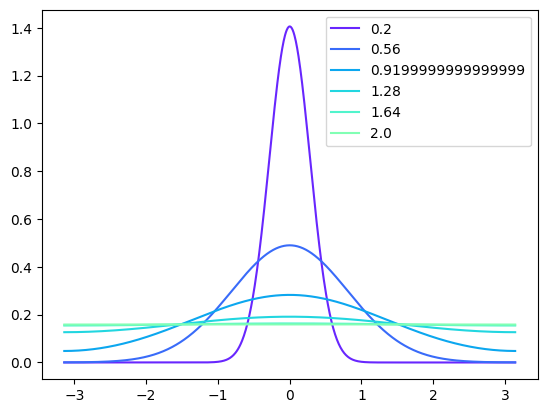

In [62]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
cmap = mpl.colormaps["rainbow"]
num_points = 1000
omega = np.linspace(-np.pi, np.pi, 1000)
sigmas = np.linspace(0.2, 2, 6)
for sigma in sigmas:
    f = angle_density(omega, sigma, num_points) / z_sigma(sigma, num_points)
    plt.plot(omega, f, color=cmap(float(sigma) / 4.))
    
plt.legend(sigmas)

因为分母的$\sin(\omega/2)=0$，因此得到的返回值为nan。然而实际操作中，分子的$\sin((l+1/2)\omega)$也应该是0，你想到了什么？

洛！

洛必达一下：

$\lim_{x\to0} \frac{\sin((l+1/2)x)}{\sin(x/2)}=\lim_{x\to0}\frac{(l+1/2)x}{x/2}=2l+1$

这样的近似在$\omega$较小的情况下都是成立的，因此我们修正上述的密度函数

In [66]:
import warnings
warnings.filterwarnings("ignore")

def approximate_angle_density(omega, sigma, L=500):
    l = np.arange(0., float(L), 1.0)[None, :]
    a = (2 * l + 1) * np.exp(-l * (l + 1) * sigma**2) * (2 * l + 1)
    f = np.sum(a, axis = -1)
    return f

def fix1_angle_density(omega, sigma, eps=1e-5, L=500):
    return np.where(np.abs(omega) > eps, angle_density(omega, sigma, L), approximate_angle_density(omega, sigma, L))
fix1_angle_density(np.array([-0.1, 0., 0.1]), sigma=1.0)

array([2.27560698, 2.28028759, 2.27560698])

让我们看一看修正后在0的邻域附近的函数图像，可以看到，在较小的$\epsilon$下，函数以很高的精度是连续的。

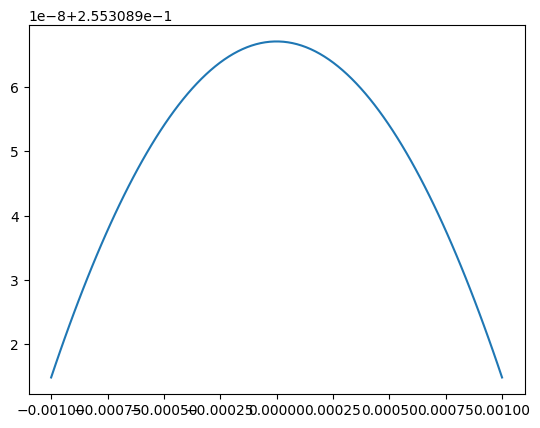

In [68]:
omega = np.linspace(-0.001, 0.001, 100)
_ = plt.plot(omega, fix1_angle_density(omega, sigma=1.0, L=200) / z_sigma(1.0, nh=200))

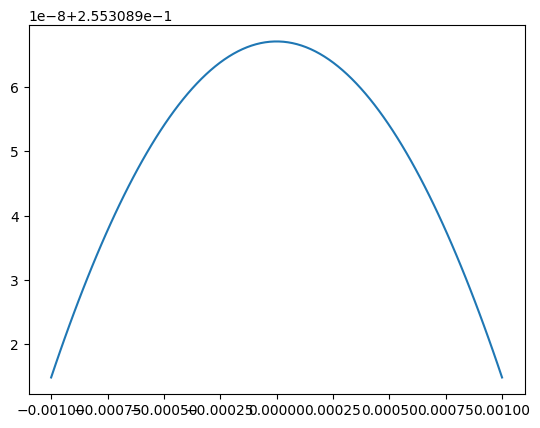

In [69]:
omega = np.linspace(-0.001, 0.001, 100)
_ = plt.plot(omega, fix1_angle_density(omega, sigma=1.) / z_sigma(1.))

Difference between gaussian and igso3
好在通过数学推导（这里不展开），我们知道，当$\sigma$较小时，角度的密度函数以很高的精度逼近以$2\sigma^2$为方差的正态分布。

因此，我们可以进一步修正密度函数。


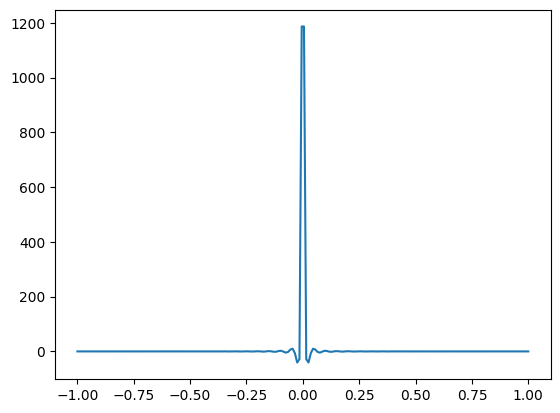

In [72]:
# small sigma, there is some artifact !!
omega = np.linspace(-1., 1., 200)
_ = plt.plot(omega, fix1_angle_density(omega, sigma=0.001) / z_sigma(0.01))

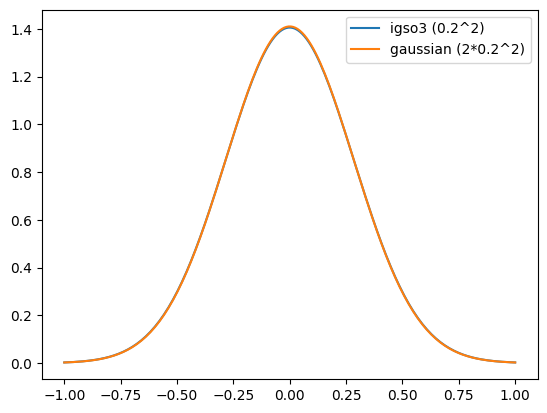

In [73]:
def approximate_gaussian(omega, sigma):
    return 1.0/np.sqrt(2.0  * np.pi) / sigma * np.exp(-0.5 * (omega/sigma) ** 2)
sigma = 0.2
plt.plot(omega, fix1_angle_density(omega, sigma=sigma) / z_sigma(sigma))
plt.plot(omega, approximate_gaussian(omega, sigma=sigma*np.sqrt(2)))
_ = plt.legend(["igso3 (0.2^2)", "gaussian (2*0.2^2)"])

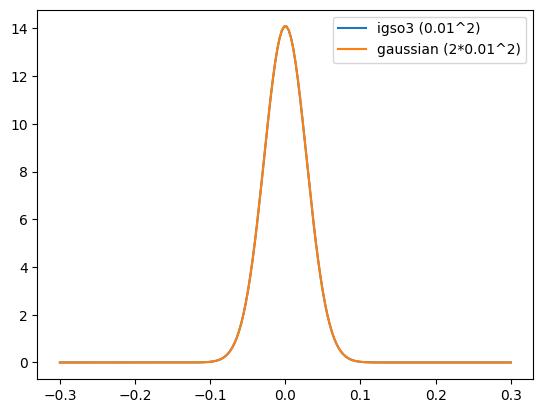

In [74]:
sigma = 0.02
omega = np.linspace(-0.3, 0.3, 200)
plt.plot(omega, fix1_angle_density(omega, sigma=sigma) / z_sigma(sigma))
plt.plot(omega, approximate_gaussian(omega, sigma=sigma*np.sqrt(2)))
_ = plt.legend(["igso3 (0.01^2)", "gaussian (2*0.01^2)"])



可以看到，在$\sigma=0.2$时，IGSO(3)分布和高斯分布几乎完全一致；但进一步减小$\sigma$后，因为artifacts的出现，分布与高斯分布之间发生了偏移。因此对于$\sigma<0.1$的情况，我们直接从高斯分布中采样。

原则上，直接采用高斯分布会在$(-\pi,\pi]$之外有质量。但因为$\sigma$非常小时才采用此近似，因此这部分质量可以忽略，我们不需要重新归一化高斯部分的密度函数。

最终得到的密度函数应为


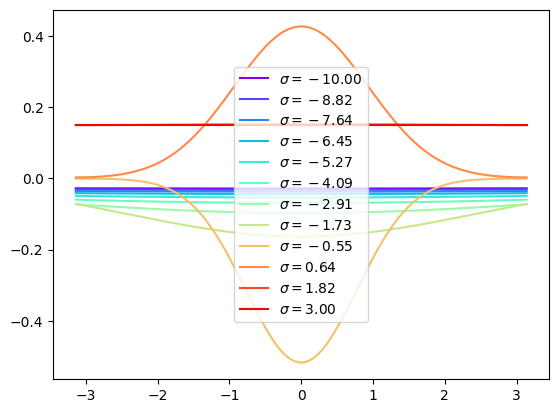

In [75]:
def igso3(omega, sigma, eps_omega=1e-6, eps_sigma=0.2, L=200):
    if sigma > eps_sigma:
        return fix1_angle_density(omega, sigma, eps_omega, L) / z_sigma(sigma, L)
    else:
        return approximate_gaussian(omega, sigma*np.sqrt(2))
    


# use small L without loss resolution
omega = np.linspace(-np.pi, np.pi, 200)
sigmas = np.exp(np.log(10.)) * np.linspace(-1., .3, 12)
for i, sigma in enumerate(sigmas):
    f = igso3(omega, sigma, L=20)
    plt.plot(omega, f, color=cmap(i/(len(sigmas)-1)))
    _ = plt.legend([f"$\sigma={s:.2f}$" for s in sigmas])

axs [<Axes: > <Axes: > <Axes: >]
index 0
fig_index 0
index 49
fig_index 1


TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

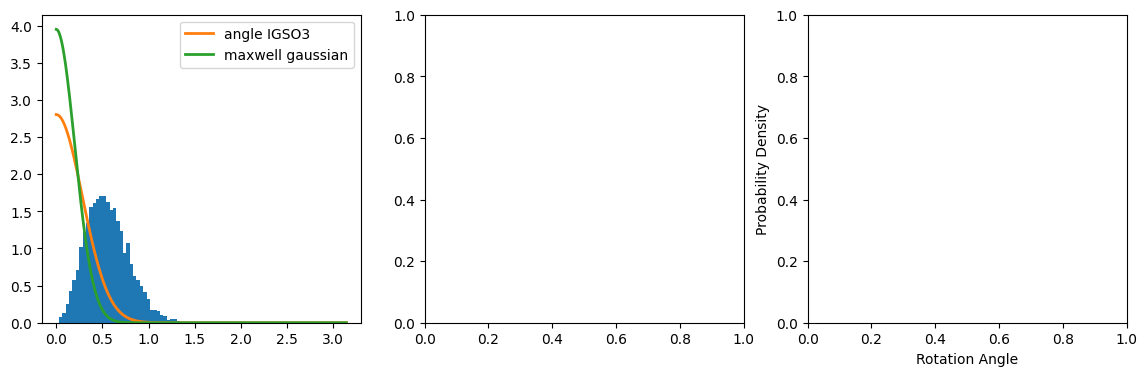

In [77]:
# make plots
fig_index = 0
f, axs = plt.subplots(1, 3, figsize=(14, 4))
axs = axs.ravel()
print("axs",axs)
for index in [int(i) for i in np.linspace(0,len(std_all)-1,3)]:
    print("index",index)
    print("fig_index",fig_index)
    std = std_all[index] 
    xlist = torch.linspace(0,math.pi,500)

    zlist = igso3(xlist, std, 500)
    zlist = zlist/(zlist.sum()*(math.pi/500))

    wlist = approximate_gaussian(xlist, std)
    wlist = wlist/(wlist.sum()*(math.pi/500))

    # Plot histogram
    axs[fig_index].hist(angles_list[index], bins='auto', density=True)

    axs[fig_index].plot(xlist[:], zlist[:], linewidth=2, label='angle IGSO3')
    axs[fig_index].plot(xlist[:], wlist[:], linewidth=2, label='maxwell gaussian')
    plt.xlabel("Rotation Angle")
    plt.ylabel("Probability Density")
    axs[fig_index].legend()
    fig_index += 1
    # plt.show()
# plt.title("Histogram of Rotation Angles")

## Score function in SO3 space
The score function in SO3 space can be written using the chain rule:
\begin{equation}
\nabla_r \log q\left(r^{(t)}\right) =\left.\nabla_r \omega\left(  \bar{r}^{\top} r^{(t)} \right) \frac{d}{d \omega} [ \log \frac{ f\left(\omega ; \sigma_t^2\right) } { 1 - \cos \omega} ] \right|_{\omega=\omega\left(\bar{r}^{\top} r\right)}
\end{equation}

Write the gradient of the rotation angle in compact form:
Write in a compact form, using the identity
\begin{equation}
    \hat{r} v = \log (\hat{r} e^v \hat{r}^{\top})
\end{equation}
\begin{equation}
    \nabla_r \omega\left(\hat{r}^{\top} r\right) =  \frac{\hat{r} \log(\hat{r}^{\top} r)}{\omega(\hat{r}^{\top} r)} = \frac{ \log(r \hat{r}^{\top})}{\omega(\hat{r}^{\top} r)} = \frac{r \log(\hat{r}^{\top} r)}{\omega(\hat{r}^{\top} r)} 
\end{equation}

In [78]:
# here we make sigma larger than 0.2!!!
std_all = torch.tensor(std_all)
# store the current rotation matrices
rot_back_mats = np.copy(rot_mats)
rot_back_mats = torch.tensor(rot_back_mats).float()
rot_mats_0 = torch.tensor(rot_mats_0).float()
print("std_all ", std_all)
print("rot_mats shape", rot_mats.shape)
print("initial rot mats shape", rot_mats_0.shape)

std_all  tensor([0.2000, 0.2828, 0.3464, 0.4000, 0.4472, 0.4899, 0.5292, 0.5657, 0.6000,
        0.6325, 0.6633, 0.6928, 0.7211, 0.7483, 0.7746, 0.8000, 0.8246, 0.8485,
        0.8718, 0.8944, 0.9165, 0.9381, 0.9592, 0.9798, 1.0000, 1.0198, 1.0392,
        1.0583, 1.0770, 1.0954, 1.1136, 1.1314, 1.1489, 1.1662, 1.1832, 1.2000,
        1.2166, 1.2329, 1.2490, 1.2649, 1.2806, 1.2961, 1.3115, 1.3267, 1.3416,
        1.3565, 1.3711, 1.3856, 1.4000, 1.4142, 1.4283, 1.4422, 1.4560, 1.4697,
        1.4832, 1.4967, 1.5100, 1.5232, 1.5362, 1.5492, 1.5620, 1.5748, 1.5875,
        1.6000, 1.6125, 1.6248, 1.6371, 1.6492, 1.6613, 1.6733, 1.6852, 1.6971,
        1.7088, 1.7205, 1.7321, 1.7436, 1.7550, 1.7664, 1.7776, 1.7889, 1.8000,
        1.8111, 1.8221, 1.8330, 1.8439, 1.8547, 1.8655, 1.8762, 1.8868, 1.8974,
        1.9079, 1.9183, 1.9287, 1.9391, 1.9494, 1.9596, 1.9698, 1.9799, 1.9900,
        2.0000])
rot_mats shape (5000, 3, 3)
initial rot mats shape torch.Size([5000, 3, 3])


In [81]:
progress_bar = tqdm(range(steps-1, -1, -1), desc = "Progress:", ncols=100)

agnles_back_list = []
score_list = []
for process_index in progress_bar:
    sigma_t = std_all[process_index]
    if process_index == 0:
        delta_sigma_sqs = std_all[process_index]**2
    else:
        delta_sigma_sqs = std_all[process_index] ** 2 - std_all[process_index - 1] ** 2
        
    sigma_sqs_t = std_all[process_index] ** 2
    if process_index == 0:
        sigma_sqs_s = 0
    else:
        sigma_sqs_s = std_all[process_index - 1] ** 2
        
    betas = sigma_sqs_t - sigma_sqs_s 
    # MISSING UFCONF


Progress:: 100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 22684.18it/s]

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
